# 1. Vorlesung Nichtlineare Regelungstechnik 1

## Beispiel zum Thema Chaos (Teil 2)

Das folgende System wird für verschiedene Anfangswerte simuliert, um zu zeigen, dass bereits kleine Unterschiede in diesen zu qualitativ stark unterschiedlichem Verhalten führen können:

\begin{equation*}
\ddot x(t) + a \cdot \dot x(t) + b^2 \cdot \sin(x) = c \cdot b \cdot u(t) \quad \text{mit} \quad u(t) = \cos(d \cdot t)
\end{equation*}

mit $a = 0.75$, $b = 1.5$, $c = 0.75$ und $d = 1$. Es handelt sich um das Modell eines Fadenpendels mit Reibung, das von außen harmonisch erregt wird.

---

Die aktuelle Fassung dieses Notebooks findet sich in folgendem Repositorium:

https://gitlab.hrz.tu-chemnitz.de/rst/public/teaching/nl1-nbviewer-content

Sie können zur Entwicklung/ Verbesserung über Merge Requests beitragen!

---

<p style="font-family:Courier New; font-size:10pt">
Copyright (c) 2022-2023 Philipp Daferner und Jan Winkler, TU Dresden, Germany
</p>

<p style="font-family:Courier New; font-size:10pt">
This program is free software: you can redistribute it and/or modify<br>
it under the terms of the GNU General Public License as published by<br>
the Free Software Foundation, either version 3 of the License, or<br>
(at your option) any later version.
</p>
    
<p style="font-family:Courier New; font-size:10pt">
This program is distributed in the hope that it will be useful,<br>
but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
GNU General Public License for more details: <br>
<a href=https://www.gnu.org/licenses/gpl-3.0.txt>https://www.gnu.org/licenses/gpl-3.0.txt</a>.
</p>

---

# Simulation

## Import der nötigen Module

In [1]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
from dataclasses import dataclass

## Festlegung der Simulationsparameter

In [2]:
@dataclass
class sim_para:
    t0 = 0          # start time
    tf = 100        # final time
    dt = 0.04       # step-size
    a = 0.75        # Parameter a der Dgl.
    b = 1.5         # Parameter b der Dgl.
    c = 1.07        # Parameter c der Dgl.
    d = 1.0         # Parameter d der Dgl.

## Definition der rechten Seite der Differenzialgleichung und der Erregung

Definition der rechten Seit der Dgl. Dazu wird die Dgl. zweiter Ordnung in zwei Dgls. 
erster Ordnung mittels der Transformation $x_1 := x$, $x_2 := \dot x$ überführt.

In [3]:
def system_dgl(t, x, a, b, c, d):
    
    x1, x2 = x            # Extraktion Zustandsgrößen
    u = control(t, d)  # Stellgesetz

    # dxdt = f(x, u):
    dxdt = np.array([x2,
                     -b**2 * np.sin(x1) - a * x2 + c * b**2 * u])

    return dxdt

Das Stellgesetz wird hier als separate Funktion definiert, um den Verlauf nach Berechnung der Lösung noch einmal berechnen zu können (Details siehe unten).

In [4]:
def control(t, d):

    return np.cos(d * t)        

## Definition des Zeitvektors und der Anfangszustände

Es werden vier Simulationen durchgeführt. Die Anfangswerte der Simulationen unterscheiden sich dabei nur um den Wert $\mathrm{d}x = 0.001$ bzw. Bruchteile davon.

Außerdem wird der Zeitvektor definiert, an dem Lösungsergebnisse gewünscht werden. Dies sichert einen glatten Verlauf in der Darstellung mit äquidistanten Zeitpunkten.

In [5]:
# Anfangszustand
dx = 1e-3
x0A = [2, -2]
x0B = [x0A[0] + dx, x0A[1] + dx]
x0C = [x0A[0] + 0.005*dx, x0A[1] + 0.005*dx]
x0D = [x0A[0] + 0.001*dx, x0A[1] + 0.001*dx]
x0_vec = [x0B, x0A, x0C, x0D]

# Zeitvektor
tt = np.arange(sim_para.t0, sim_para.tf + sim_para.dt, sim_para.dt)

## Durchführung der Simulation

Die Simulation läuft mit variabler Schrittweite, deren Maximalwert durch `sim_para.dt` festgelegt ist. Ergebnisse werden an den in dem Vektor `tt` festgelegten Punkten bereit gestellt.

Nach der Simulation muss noch der Verlauf der Stellgröße $u$ bestimmt werden. Dies kann nicht innerhalb der Funktion `system_dgl` erfolgen, da diese aufgrund der variablen Schrittweite diverse Male zwischen den Zeitpunkten aufgerufen wird und Aufrufe mitunter auch verworfen werden.

<div class="alert alert-block alert-info">
    <b>Information:</b> <code>lambda t, x: system_dgl(t, x, im_para.a, sim_para.b, sim_para.c, sim_para.d)</code> sorgt dafür, dass der Funktionsaufruf <code>system_dgl(t, x, a, b, c, d)</code> für den Löser so aussieht wie <code>system_dgl(t, x)</code>, aber dennoch die Parameter `a` bis `d` übergeben werden.
</div>

In [6]:
outputs = []
for x0 in x0_vec:
    sol = sci.solve_ivp(lambda t, x: system_dgl(t, x, sim_para.a, sim_para.b, sim_para.c, sim_para.d), 
                        [sim_para.t0, sim_para.tf], x0, max_step=sim_para.dt, t_eval=tt)
    outputs.append(sol.y)
    
# Nachberechung des zugehörigen Stellgrößenverlaufes
u_traj = control(tt, sim_para.d) 

## Ergebnisse darstellen

<div class="alert alert-block alert-info">
    <b>Tip:</b> Entfernen Sie das Kommentarzeichen `#` vor `%matplotlib widget`, um interaktive Plots zu erhalten (ggf. Menüpunkt Kernel - Restart Kernel and Run All Cells erforderlich).
</div>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
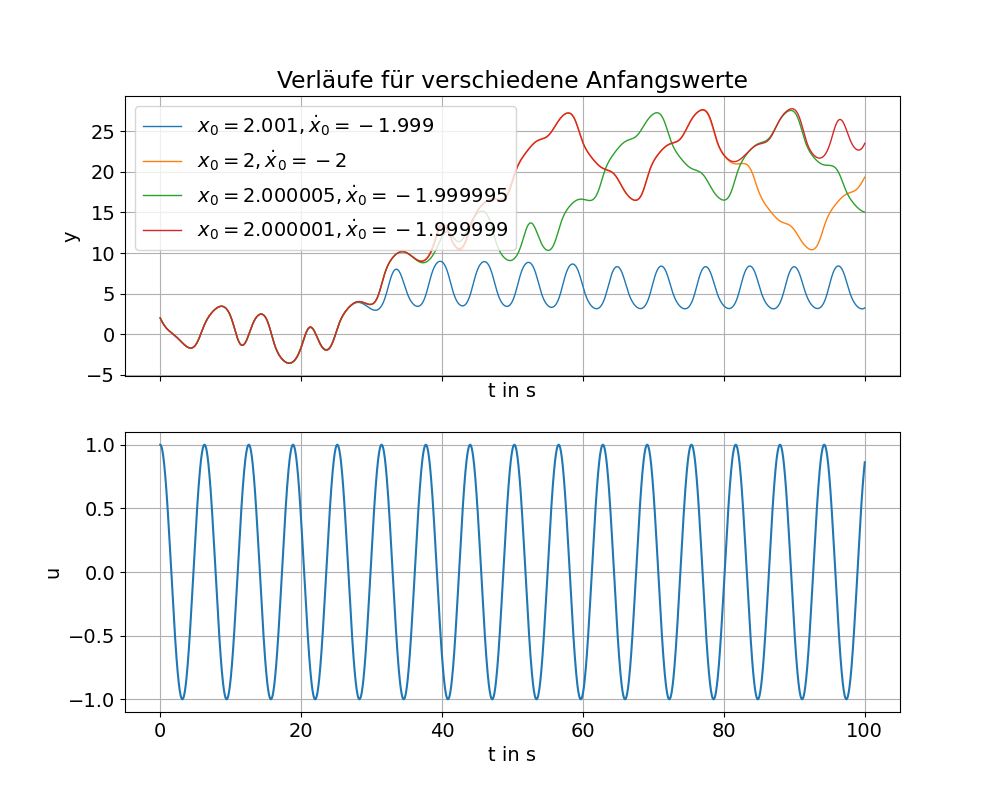

In [7]:
%matplotlib widget

# Schriftgröße
plt.rcParams['font.size'] = '14'

# Abbildung mit mehreren Plots erstellen
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

# Größe festlegen
fig.set_size_inches(10,8)

# Ausgang
for i, x0 in enumerate(x0_vec):
    ax[0].plot(tt, outputs[i][0, :], label='$x_0={}, \dot x_0={}$'.format(x0[0], x0[1]), lw=1)

ax[0].grid(True)
ax[0].set_title('Verläufe für verschiedene Anfangswerte')
ax[0].set_ylabel(r'y')
ax[0].set_xlabel(r't in s')
ax[0].legend()

# Stellgröße
ax[1].plot(tt, u_traj)
ax[1].grid(True)
ax[1].set_ylabel(r'u')
ax[1].set_xlabel(r't in s')

plt.show()